In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
inspector = inspect(engine)

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
print(Base.classes.keys())
print(inspector.get_table_names())

['measurement', 'station']
['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# View columns in Measurement table
columns = inspector.get_columns('measurement')
for each in columns:
    print(each["name"], each["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# View columns in Station table
columns = inspector.get_columns('station')
for each in columns:
    print(each["name"], each["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


In [ ]:
all_m = session.query(Measurement).order_by(Measurement.date.desc())
for row in all_m:
    print(row.date, row.station, row.prcp)

# ***cell not required

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# prior_12 = session.query(Measurement).filter(Measurement.date >= 2016-08-23)

date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.date, Measurement.prcp).\
                  filter(Measurement.date > date).order_by(Measurement.date.desc())

# List comprehension solution
prior12_rows = [{"Date": result[0], "Precipitation": result[1]} for result in results]
print(len(prior12_rows))
prior12_rows

2223


[{'Date': '2017-08-23', 'Precipitation': 0.0},
 {'Date': '2017-08-23', 'Precipitation': 0.0},
 {'Date': '2017-08-23', 'Precipitation': 2.0},
 {'Date': '2017-08-23', 'Precipitation': 11.4},
 {'Date': '2017-08-22', 'Precipitation': 0.0},
 {'Date': '2017-08-22', 'Precipitation': 0.0},
 {'Date': '2017-08-22', 'Precipitation': 12.7},
 {'Date': '2017-08-21', 'Precipitation': 0.0},
 {'Date': '2017-08-21', 'Precipitation': 0.5},
 {'Date': '2017-08-21', 'Precipitation': None},
 {'Date': '2017-08-21', 'Precipitation': 14.2},
 {'Date': '2017-08-20', 'Precipitation': 0.0},
 {'Date': '2017-08-20', 'Precipitation': 0.3},
 {'Date': '2017-08-20', 'Precipitation': None},
 {'Date': '2017-08-19', 'Precipitation': 0.0},
 {'Date': '2017-08-19', 'Precipitation': 0.0},
 {'Date': '2017-08-19', 'Precipitation': None},
 {'Date': '2017-08-19', 'Precipitation': 2.3},
 {'Date': '2017-08-18', 'Precipitation': 0.0},
 {'Date': '2017-08-18', 'Precipitation': 0.0},
 {'Date': '2017-08-18', 'Precipitation': 1.5},
 {'Date

In [14]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
prior12_df = pd.DataFrame(prior12_rows)
prior12_df

# # Sort the dataframe by date
df = prior12_df.set_index('Date', drop=False)
df.sort_index()

,Date,Precipitation
Date,,
2016-08-24,2016-08-24,36.8
2016-08-24,2016-08-24,2.0
2016-08-24,2016-08-24,54.6
2016-08-24,2016-08-24,54.6
2016-08-24,2016-08-24,NaN
...,...,...
2017-08-22,2017-08-22,0.0
2017-08-23,2017-08-23,11.4
2017-08-23,2017-08-23,2.0


Text(0, 0.5, 'mm')

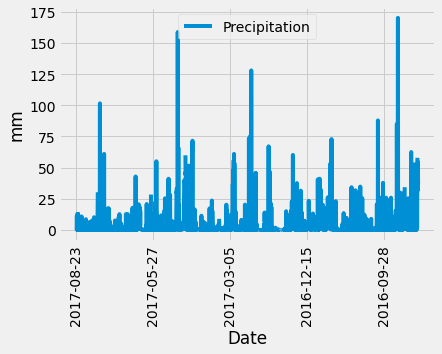

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("mm")

In [ ]:
df["Precipitation"].describe()

In [ ]:
prior12_df[['Date', 'Precipitation']].groupby('Date').mean()

In [ ]:
prior12_df[['Date', 'Precipitation']].groupby('Date').describe()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
max_prcp = 
min_prcp =
mean_prcp =


In [16]:
session.close()

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
st_count = session.query(Station).group_by(Station.station)
# print(len(st_count))
for row in st_count:
    print(f"id: {row.id}, station: {row.station}, name: {row.name}")
print(f"Total number of stations: {st_count.count()}")

id: 7, station: USC00511918, name: HONOLULU OBSERVATORY 702.2, HI US
id: 1, station: USC00513117, name: KANEOHE 838.1, HI US
id: 2, station: USC00514830, name: KUALOA RANCH HEADQUARTERS 886.9, HI US
id: 8, station: USC00516128, name: MANOA LYON ARBO 785.2, HI US
id: 3, station: USC00517948, name: PEARL CITY, HI US
id: 4, station: USC00518838, name: UPPER WAHIAWA 874.3, HI US
id: 6, station: USC00519281, name: WAIHEE 837.5, HI US
id: 0, station: USC00519397, name: WAIKIKI 717.2, HI US
id: 5, station: USC00519523, name: WAIMANALO EXPERIMENTAL FARM, HI US
Total number of stations: 9


In [18]:
session.close()

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
measurement_df = pd.read_sql("SELECT * FROM Measurement", conn)
measurement_df

,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,2.0,18.3
1,1,USC00519397,2010-01-02,0.0,17.2
2,2,USC00519397,2010-01-03,0.0,23.3
3,3,USC00519397,2010-01-04,0.0,24.4
4,4,USC00519397,2010-01-06,NaN,22.8
...,...,...,...,...,...
19545,19545,USC00516128,2017-08-19,2.3,21.7
19546,19546,USC00516128,2017-08-20,NaN,25.6
19547,19547,USC00516128,2017-08-21,14.2,24.4
19548,19548,USC00516128,2017-08-22,12.7,24.4


In [21]:
station_df = pd.read_sql("SELECT * FROM Station", conn)
station_df

,id,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,0.914
1,1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,4.450
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,2.133
3,3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,3.627
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,93.447
5,5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,5.943
6,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027
7,7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.274
8,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,46.449


In [22]:
df = pd.merge(station_df, measurement_df, on="station")
df

,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,0,2010-01-01,2.0,18.3
1,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,1,2010-01-02,0.0,17.2
2,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2,2010-01-03,0.0,23.3
3,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,3,2010-01-04,0.0,24.4
4,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,4,2010-01-06,NaN,22.8
...,...,...,...,...,...,...,...,...,...,...
19545,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,19545,2017-08-19,2.3,21.7
19546,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,19546,2017-08-20,NaN,25.6
19547,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,19547,2017-08-21,14.2,24.4
19548,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,46.449,19548,2017-08-22,12.7,24.4


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
gr_df = df.groupby('station').count()
gr_df = gr_df.sort_values('id_x', ascending=False)
gr_df = gr_df.reset_index()
gr_df

,station,id_x,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,USC00519281,2772,2772,2772,2772,2772,2772,2772,2772,2772
1,USC00519397,2724,2724,2724,2724,2724,2724,2724,2685,2724
2,USC00513117,2709,2709,2709,2709,2709,2709,2709,2696,2709
3,USC00519523,2669,2669,2669,2669,2669,2669,2669,2572,2669
4,USC00516128,2612,2612,2612,2612,2612,2612,2612,2484,2612
5,USC00514830,2202,2202,2202,2202,2202,2202,2202,1937,2202
6,USC00511918,1979,1979,1979,1979,1979,1979,1979,1932,1979
7,USC00517948,1372,1372,1372,1372,1372,1372,1372,683,1372
8,USC00518838,511,511,511,511,511,511,511,342,511


In [32]:
# List the stations and the counts in descending order.
for i in gr_df.index:
    print(gr_df['station'][i], gr_df['id_x'][i])

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Create active_df for most active station
active_df = df.loc[df['station']== 'USC00519281',:]
active_df


,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
12187,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,12187,2010-01-01,3.8,21.1
12188,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,12188,2010-01-02,0.0,16.7
12189,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,12189,2010-01-03,0.0,23.3
12190,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,12190,2010-01-04,0.0,23.9
12191,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,12191,2010-01-05,0.0,23.3
...,...,...,...,...,...,...,...,...,...,...
14954,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,14954,2017-08-14,0.0,25.0
14955,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,14955,2017-08-15,8.1,25.0
14956,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,14956,2017-08-16,3.0,24.4
14957,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,10.027,14957,2017-08-17,0.3,24.4


In [37]:
# calculate the lowest, highest, and average temperature
lowest_temp = active_df['tobs'].min()
highest_temp = active_df['tobs'].max()
average_temp = active_df['tobs'].mean()
print(lowest_temp)
print(highest_temp)
print(average_temp)

12.2
29.4
22.035822510822513


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [38]:
# Close Session
session.close()